# Finding Feasible Counterfactual Explanations (FCX)

Feasible Counterfactual Explanations (FCX) is a novel framework that generates realistic and low-cost counterfactuals by enforcing both hard feasibility constraints provided by domain experts and soft causal constraints inferred from data. Built on a modified Variational Autoencoder and optimized with a multi-factor loss function, FCX produces sparse, diverse, and actionable counterfactuals while preserving causal relationships, offering both individual-level explanations and global model feasibility assessments across multiple datasets.

### KDD - Census Dataset Example

This notebook demonstrates preparation, training, and evaluation of the FCX models  
specifically for the **KDD - Census** dataset.  
We will:
1. Unpack the preprocessed data  
2. (Optional) Fine‑tune the black‑box model  
3. Train the unary and binary counterfactual generators  
4. Evaluate the trained generators  

In [ ]:
# Unzip the Adult dataset archive
#!7z x data.7z -o ./data


Load paths

In [1]:
import sys, os
import importlib.util
exp_dir = os.path.abspath(os.path.join('..','..','humancompatible','explain'))
sys.path.insert(0, exp_dir)

fcx_dir = os.path.abspath(os.path.join('..','..','humancompatible','explain','fcx'))
sys.path.insert(0, fcx_dir)

# compute absolute path to the `scripts` folder
scripts_dir = os.path.abspath(
    os.path.join('..', '..', 'humancompatible', 'explain', 'fcx', 'scripts')
)
sys.path.append(scripts_dir)
# 1) Compute the full path to your script
script_path = os.path.abspath(
    os.path.join('..','..','humancompatible','explain','fcx','scripts','blackbox-model-train.py')
)
# 2) Create a module spec and module object
spec = importlib.util.spec_from_file_location("blackbox_model_train", script_path)
bb_mod = importlib.util.module_from_spec(spec)

# 3) Execute the module in its own namespace
spec.loader.exec_module(bb_mod)

# 4) Extract the function
train_blackbox = bb_mod.train_blackbox

## 1. (Optional) Fine‑tune the black‑box model for KDD - Census

Run this first if the provided checkpoint isn’t compatible.

In [ ]:


# Fine-tune/load the black‑box model
train_blackbox('census')

## 2. Train FCX on the KDD - Census dataset

Next, we train the **unary** generator, then the **binary** generator.

In [ ]:

from FCX_binary_generation_census import train_binary_fcx_vae
#!pip install networkx==2.8
# Call it for the Adult dataset
train_binary_fcx_vae(
    'census',
    base_data_dir='../../data/',
    base_model_dir='../models/',
    batch_size=2048, #2048
    epochs=25, #50
    validity=29.0,
    feasibility=192.0,
    margin=0.764
)

{0: 0, 1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 3, 11: 4, 12: 5, 13: 5, 14: 5, 15: 6, 16: 7}
   age                 class_of_worker          major_industry_code  \
0   58  Self-employed-not incorporated                 Construction   
1   18                 Not in universe  Not in universe or children   
2    9                 Not in universe  Not in universe or children   
3   10                 Not in universe  Not in universe or children   
4   48                         Private                Entertainment   

                 major_occupation_code                   education  \
0  Precision production craft & repair  Some college but no degree   
1                      Not in universe                  10th grade   
2                      Not in universe                    Children   
3                      Not in universe                    Children   
4               Professional specialty  Some college but no degree   

   wage_per_hour                   marital

c:\Users\kleop\Downloads\explain-main\humancompatible\explain\fcx\scripts\fcx_vae_model.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  c=torch.tensor(c).float()
c:\Users\kleop\Anaconda3\envs\explain\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


recon:  tensor(98797.5391, device='cuda:0', grad_fn=<NegBackward0>)  KL:  tensor(0.0980, device='cuda:0', grad_fn=<MeanBackward0>)  Validity:  tensor([45.9393], device='cuda:0', grad_fn=<NegBackward0>) sparsity:  tensor([4.2264], device='cuda:0', grad_fn=<MulBackward0>) reg_loss:  tensor(1.3850, device='cuda:0', grad_fn=<DivBackward0>)
recon:  tensor(53753.5117, device='cuda:0', grad_fn=<NegBackward0>)  KL:  tensor(0.1595, device='cuda:0', grad_fn=<MeanBackward0>)  Validity:  tensor([45.6580], device='cuda:0', grad_fn=<NegBackward0>) sparsity:  tensor([4.0789], device='cuda:0', grad_fn=<MulBackward0>) reg_loss:  tensor(1.7527, device='cuda:0', grad_fn=<DivBackward0>)
recon:  tensor(20735.8359, device='cuda:0', grad_fn=<NegBackward0>)  KL:  tensor(0.1749, device='cuda:0', grad_fn=<MeanBackward0>)  Validity:  tensor([44.9478], device='cuda:0', grad_fn=<NegBackward0>) sparsity:  tensor([3.9563], device='cuda:0', grad_fn=<MulBackward0>) reg_loss:  tensor(1.7050, device='cuda:0', grad_fn=<D

## 3. Evaluate the trained models (KDD - Census)

Run evaluation scripts to compute validity and feasibility metrics.

   age                 class_of_worker          major_industry_code  \
0   58  Self-employed-not incorporated                 Construction   
1   18                 Not in universe  Not in universe or children   
2    9                 Not in universe  Not in universe or children   
3   10                 Not in universe  Not in universe or children   
4   48                         Private                Entertainment   

                 major_occupation_code                   education  \
0  Precision production craft & repair  Some college but no degree   
1                      Not in universe                  10th grade   
2                      Not in universe                    Children   
3                      Not in universe                    Children   
4               Professional specialty  Some college but no degree   

   wage_per_hour                   marital_status  \
0              0                         Divorced   
1              0                    Never marr

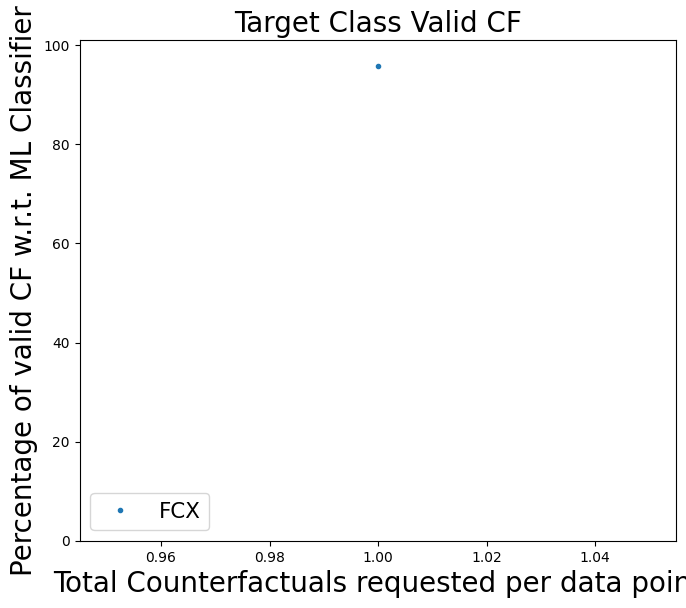

[95.80251057]
Mean Age-Ed Constraint Score:  82.61174654410217 17.388253455897832 0.8261174654410217
Count:  10 14239 2 14251
Pos Count:  7 11766 0
Pos Percentage:  0.7 0.8263220731792963 0.0
Mean Age-Ed Constraint Score:  83.05645501900605 16.943544980993945 0.8305645501900605
Count:  9 14196 1 14206
Pos Count:  4 11795 0
Pos Percentage:  0.4444444444444444 0.8308678500986193 0.0
Mean Age-Ed Constraint Score:  83.02270179372198 16.97729820627803 0.8302270179372198
Count:  8 14260 4 14272
Pos Count:  3 11846 0
Pos Percentage:  0.375 0.8307152875175315 0.0
Mean Age-Ed Constraint Score:  82.81622911694511 17.183770883054894 0.8281622911694511
Count:  9 14237 0 14246
Pos Count:  4 11794 0
Mean Age-Ed Constraint Score:  82.87331423380617 17.126685766193837 0.8287331423380617
Count:  10 14297 4 14311
Pos Count:  5 11855 0
Pos Percentage:  0.5 0.8291949360005596 0.0
Mean Age-Ed Constraint Score:  82.9035874439462 17.09641255605381 0.8290358744394619
Count:  9 14262 1 14272
Pos Count:  5 1182

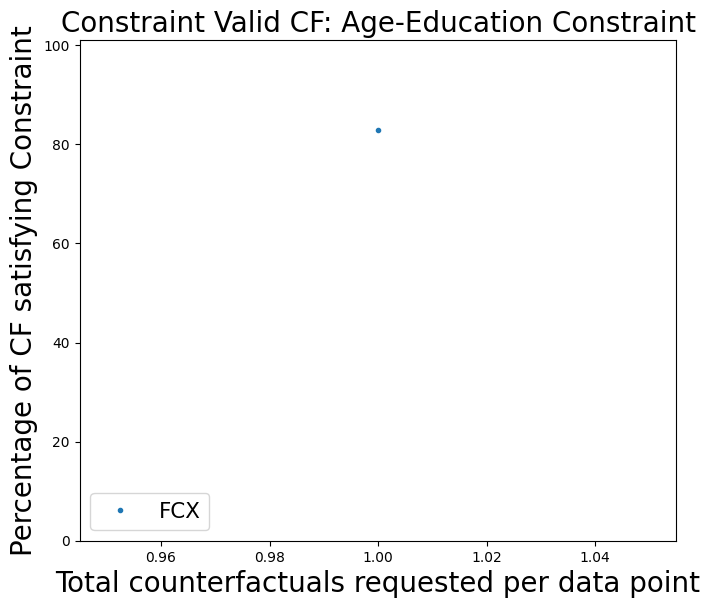

[82.88628147]
Mean Proximity Score:  -10.135122602902676
Mean Proximity Score:  -10.133528846609464
Mean Proximity Score:  -10.13406265918128
Mean Proximity Score:  -10.12903197544709
Mean Proximity Score:  -10.135855176131
Mean Proximity Score:  -10.13379562949903
Mean Proximity Score:  -10.134034216324647
Mean Proximity Score:  -10.134075461551674
Mean Proximity Score:  -10.13420431818092
Mean Proximity Score:  -10.134381885515836


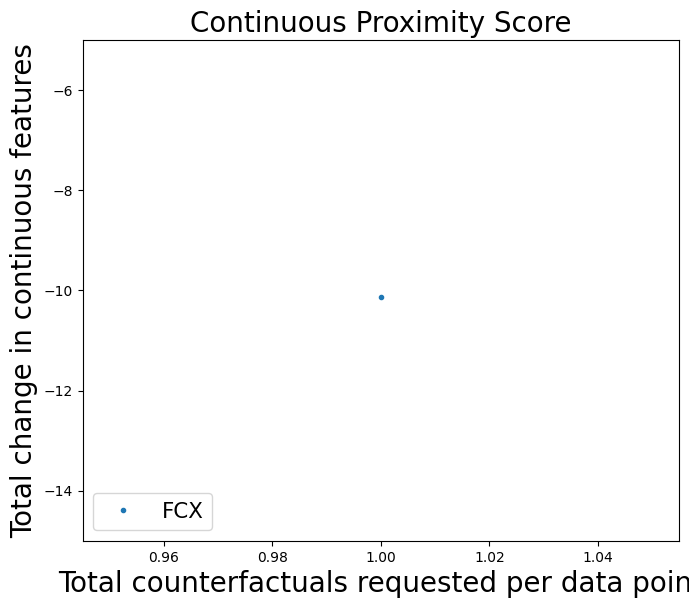

[-10.13380928]
Mean Proximity Score:  -9.21178760824327
Mean Proximity Score:  -9.214741223065047
Mean Proximity Score:  -9.215412499160905
Mean Proximity Score:  -9.217560582667652
Mean Proximity Score:  -9.212593139558301
Mean Proximity Score:  -9.214674095455461
Mean Proximity Score:  -9.217694837886823
Mean Proximity Score:  -9.213063032825401
Mean Proximity Score:  -9.211720480633685
Mean Proximity Score:  -9.212861649996643


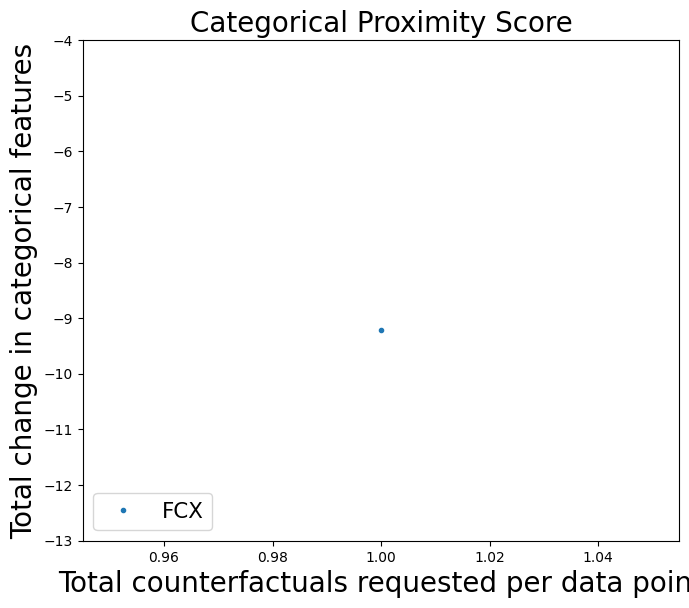

[-9.21421091]
----->> Average lof score 1.0742281675338745
----->> Average lof score 1.0823956727981567
----->> Average lof score 1.0786155462265015
----->> Average lof score 1.0794458389282227
----->> Average lof score 1.0775573253631592
----->> Average lof score 1.0767704248428345
----->> Average lof score 1.076957106590271
----->> Average lof score 1.0761762857437134
----->> Average lof score 1.078748106956482
----->> Average lof score 1.0767508745193481


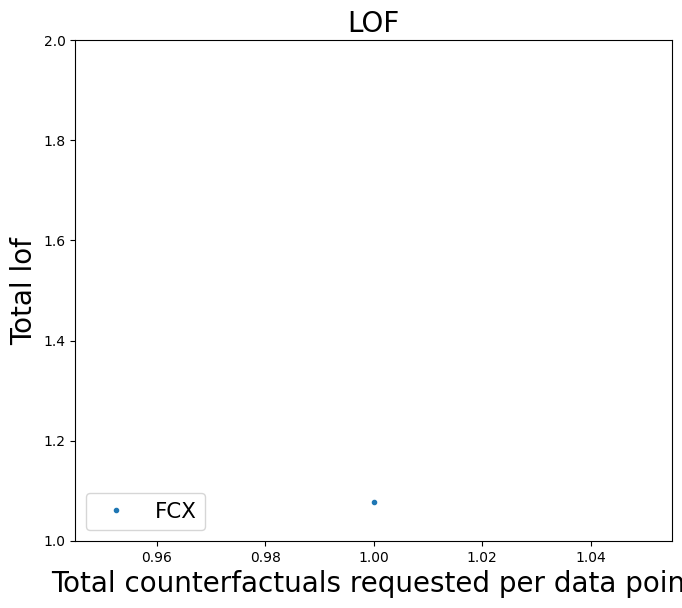

[1.0767509]
{'census': {'validity': {'FCX': [[95.7642478351346], [96.00590722964355], [95.48902463583272], [95.58971605021145], [96.11331140498086], [95.85822648855475], [95.55615224541855], [95.82466268376183], [95.90521581526482], [95.91864133718198]]}, 'const-score': {'FCX': [array([82.61174654]), array([83.05645502]), array([83.02270179]), array([82.81622912]), array([82.87331423]), array([82.90358744]), array([82.92391915]), array([83.02826285]), array([82.72115519]), array([82.90544332])]}, 'cont-prox': {'FCX': [[-10.135122602902676], [-10.133528846609464], [-10.13406265918128], [-10.12903197544709], [-10.135855176131], [-10.13379562949903], [-10.134034216324647], [-10.134075461551674], [-10.13420431818092], [-10.134381885515836]]}, 'cat-prox': {'FCX': [[-9.21178760824327], [-9.214741223065047], [-9.215412499160905], [-9.217560582667652], [-9.212593139558301], [-9.214674095455461], [-9.217694837886823], [-9.213063032825401], [-9.211720480633685], [-9.212861649996643]]}, 'LOF': {'

In [ ]:

from evaluate_binary_census import evaluate_census
import warnings
warnings.filterwarnings("ignore")
res = evaluate_census(
    base_data_dir='../../data/',
    base_model_dir='../models/',
    dataset_name='census',
    pth_name = 'census-margin-0.764-feasibility-192.0-validity-29.0-epoch-25-fcx-binary.pth'
)
print(res)

Read the results from csv files